In [1]:
# import data manipulation libraries
import numpy as np
import pandas as pd
# import visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
# import statistical tools
from scipy import stats
# import data wrangle functions
import wrangle_austin_shelter as w

In [2]:
animals, train, validate, test = w.wrangle_austin_animal_shelter()

In [3]:
animals.head()

,animal_id,name,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,datetime_out,date_of_birth,outcome_type,outcome_subtype,sex_upon_outcome,age_upon_outcome,outcome
0,A665644,NaN,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,2013-10-21 11:39:00,09/21/2013,Transfer,Partner,Intact Female,4 weeks,transfered
1,A665739,*Alana,2013-10-22 11:11:00,Austin (TX),Stray,Normal,Cat,Intact Female,1 month,Domestic Medium Hair Mix,Black,2013-12-20 17:36:00,09/16/2013,Adoption,Foster,Spayed Female,3 months,adopted
2,A665763,NaN,2013-10-22 15:10:00,E Riverside Dr/Royal Crest Dr in Austin (TX),Stray,Normal,Dog,Intact Male,4 months,Cairn Terrier Mix,Tan/White,2013-10-26 18:32:00,06/22/2013,Adoption,NaN,Neutered Male,4 months,adopted
3,A379998,Disciple,2013-10-23 11:42:00,51St And Grover in Austin (TX),Stray,Normal,Dog,Intact Male,10 years,Pit Bull,Black,2013-10-25 12:53:00,02/21/2003,Return to Owner,NaN,Intact Male,10 years,returned
4,A634503,Otter,2013-10-01 14:49:00,Manor (TX),Owner Surrender,Normal,Dog,Spayed Female,2 years,Norfolk Terrier Mix,Tan,2013-10-02 12:40:00,08/11/2011,Adoption,NaN,Spayed Female,2 years,adopted


In [3]:
animals.datetime_in.min(), animals.datetime_in.max()

(Timestamp('2013-10-01 07:51:00'), Timestamp('2023-04-24 12:30:00'))

In [4]:
animals.isna().sum()

animal_id                0
name                 44301
datetime_in              0
found_location           0
intake_type              0
intake_condition         0
animal_type              0
sex_upon_intake          0
age_upon_intake          0
breed                    0
color                    0
datetime_out             0
date_of_birth            0
outcome_type            36
outcome_subtype     117451
sex_upon_outcome         0
age_upon_outcome        46
outcome                  0
dtype: int64

In [5]:
animals[animals.sex_upon_intake.isna() == True]

,animal_id,name,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,datetime_out,date_of_birth,outcome_type,outcome_subtype,sex_upon_outcome,age_upon_outcome,outcome


#### one of the na values of the sex_upon_intake is a Test, since there is only 1 other it won't make much difference to drop that row

In [6]:
animals = animals[animals.sex_upon_intake.isna() == False]

In [7]:
animals.isna().sum()

animal_id                0
name                 44301
datetime_in              0
found_location           0
intake_type              0
intake_condition         0
animal_type              0
sex_upon_intake          0
age_upon_intake          0
breed                    0
color                    0
datetime_out             0
date_of_birth            0
outcome_type            36
outcome_subtype     117451
sex_upon_outcome         0
age_upon_outcome        46
outcome                  0
dtype: int64

In [8]:
animals.outcome_type.value_counts(dropna=False)

Adoption           91428
Transfer           47153
Return to Owner    40229
Euthanasia         10118
Rto-Adopt           1866
Died                1448
Disposal             698
Missing              103
NaN                   36
Relocate              26
Stolen                11
Name: outcome_type, dtype: int64

In [9]:
animals[animals.outcome_type.isna() == True].sort_values('animal_id')

,animal_id,name,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,datetime_out,date_of_birth,outcome_type,outcome_subtype,sex_upon_outcome,age_upon_outcome,outcome
59834,A671017,NaN,2014-01-17 12:46:00,10105 Falcon Ridge Dr. in Travis (TX),Wildlife,Sick,Other,Unknown,1 year,Fox Mix,Brown/Black,2014-01-20 08:27:00,01/17/2013,NaN,NaN,Unknown,1 year,unknown
150502,A674209,NaN,2014-03-09 16:38:00,4210 W. Braker in Austin (TX),Wildlife,Normal,Other,Unknown,0 years,Bat Mix,Brown,2014-03-09 18:15:00,03/09/2014,NaN,NaN,Unknown,0 years,unknown
180716,A679066,NaN,2014-05-16 10:58:00,Austin (TX),Wildlife,Normal,Other,Unknown,4 weeks,Rabbit Sh,Brown,2014-05-16 00:00:00,04/16/2014,NaN,NaN,Unknown,4 weeks,unknown
71942,A686025,NaN,2014-08-15 18:48:00,12901 N Ih 35 #1100 in Austin (TX),Wildlife,Normal,Other,Unknown,1 year,Bat Mix,Brown,2014-08-16 08:35:00,08/15/2013,NaN,NaN,Unknown,1 year,unknown
61228,A700839,*Turkey,2020-09-30 22:38:00,7707 Wynne Ln in Austin (TX),Stray,Normal,Dog,Neutered Male,6 years,Pit Bull Mix,Blue,2021-01-12 18:07:00,04/20/2014,NaN,NaN,Neutered Male,6 years,unknown
61224,A700839,*Turkey,2015-04-20 12:45:00,Tracy Lynn Ln And Gardner Rd in Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Pit Bull Mix,Blue,2021-01-12 18:07:00,04/20/2014,NaN,NaN,Neutered Male,6 years,unknown
61220,A700839,*Turkey,2021-01-12 15:47:00,Dittmar in Austin (TX),Stray,Normal,Dog,Neutered Male,6 years,Pit Bull Mix,Blue,2021-01-12 18:07:00,04/20/2014,NaN,NaN,Neutered Male,6 years,unknown
61216,A700839,*Turkey,2015-10-17 10:16:00,2201 West William Connon in Austin (TX),Stray,Normal,Dog,Neutered Male,1 year,Pit Bull Mix,Blue,2021-01-12 18:07:00,04/20/2014,NaN,NaN,Neutered Male,6 years,unknown
10515,A719747,Layla,2016-01-26 18:09:00,Blue Goose Rd And Cameron in Austin (TX),Stray,Normal,Dog,Intact Female,3 months,American Pit Bull Terrier Mix,White/Brown,2021-02-13 10:58:00,10/26/2015,NaN,NaN,Spayed Female,5 years,unknown
10519,A719747,Layla,2021-02-12 21:51:00,12 Street And Brazos in Austin (TX),Stray,Normal,Dog,Spayed Female,5 years,American Pit Bull Terrier Mix,White/Brown,2021-02-13 10:58:00,10/26/2015,NaN,NaN,Spayed Female,5 years,unknown


In [4]:
train.intake_type.value_counts()

Stray                 70300
Owner Surrender       25763
Public Assist          8065
Wildlife               3177
Abandoned               694
Euthanasia Request      145
Name: intake_type, dtype: int64

In [10]:
animals[animals.intake_type == 'Wildlife']

,animal_id,name,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,datetime_out,date_of_birth,outcome_type,outcome_subtype,sex_upon_outcome,age_upon_outcome,outcome
9,A666101,NaN,2013-10-26 18:33:00,Payne in Austin (TX),Wildlife,Injured,Other,Unknown,0 years,Squirrel Mix,Gray/Brown,2013-10-26 18:45:00,10/26/2013,Euthanasia,NaN,Unknown,0 years,death
10,A664830,NaN,2013-10-09 15:34:00,15043 Savannah Heights in Travis (TX),Wildlife,Sick,Other,Unknown,1 year,Raccoon Mix,Brown/Black,2013-10-09 15:59:00,10/09/2012,Euthanasia,Suffering,Unknown,1 year,death
19,A665706,NaN,2013-10-21 18:06:00,43 Rainey St in Austin (TX),Wildlife,Normal,Other,Unknown,1 year,Bat Mix,Brown,2013-10-21 18:50:00,10/21/2012,Disposal,NaN,Unknown,1 year,death
80,A665188,NaN,2013-10-14 22:25:00,2207 Pasadena Dr in Austin (TX),Wildlife,Normal,Other,Unknown,4 weeks,Bat,Brown/Black,2013-10-15 08:16:00,09/14/2013,Euthanasia,Rabies Risk,Unknown,4 weeks,death
87,A664579,NaN,2013-10-05 14:55:00,8425 Adirondack Trail in Austin (TX),Wildlife,Sick,Other,Unknown,2 years,Raccoon Mix,Black/White,2013-10-05 16:05:00,10/05/2011,Euthanasia,Rabies Risk,Unknown,2 years,death
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193018,A878902,NaN,2023-04-18 16:23:00,5704 Shoal Creek Blvd in Austin (TX),Wildlife,Injured,Other,Unknown,2 years,Raccoon,Brown,2023-04-19 11:27:00,04/18/2021,Euthanasia,Rabies Risk,Unknown,2 years,death
193038,A878942,NaN,2023-04-19 12:27:00,8202 Daleview Dr in Austin (TX),Wildlife,Injured,Other,Unknown,2 years,Raccoon,Brown,2023-04-19 15:02:00,04/19/2021,Euthanasia,Rabies Risk,Unknown,2 years,death
193065,A879072,NaN,2023-04-20 20:03:00,Travis (TX),Wildlife,Sick,Other,Unknown,2 years,Skunk,Black/White,2023-04-21 10:32:00,04/20/2021,Disposal,NaN,Unknown,2 years,death
193072,A879093,NaN,2023-04-21 10:54:00,8507 Rosemary Lane in Austin (TX),Wildlife,Injured,Other,Unknown,2 years,Skunk,Black/White,2023-04-21 12:36:00,04/21/2021,Euthanasia,Rabies Risk,Unknown,NaN,death


In [11]:
animals[animals.intake_type == 'Wildlife'].outcome_type.value_counts()

Euthanasia         5080
Disposal            452
Died                152
Transfer             72
Relocate             14
Adoption              7
Return to Owner       4
Missing               2
Name: outcome_type, dtype: int64

In [12]:
((72 + 14 + 7 + 4) / 5789) * 100

1.6755916393159442

#### Looks like things don't turn out very well for wildlife that gets sent to the animal shelter, only 1.68 % survive a trip to the animal shelter

In [13]:
animals.animal_type.value_counts()

Dog          121412
Cat           62893
Other          8030
Bird            755
Livestock        26
Name: animal_type, dtype: int64

In [14]:
animals[(animals.animal_type == 'Other') & (animals.intake_type != 'Wildlife')]

,animal_id,name,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,datetime_out,date_of_birth,outcome_type,outcome_subtype,sex_upon_outcome,age_upon_outcome,outcome
314,A665986,Spaz,2013-10-25 15:19:00,Austin (TX),Owner Surrender,Normal,Other,Intact Male,1 year,Californian Mix,White/Black,2013-10-30 16:31:00,10/25/2012,Transfer,Partner,Intact Male,1 year,transfered
400,A663373,Snowball,2013-10-19 11:16:00,Austin (TX),Owner Surrender,Normal,Other,Unknown,2 months,Rabbit Sh Mix,White/Tan,2013-10-23 17:02:00,08/04/2013,Transfer,Partner,Unknown,2 months,transfered
424,A665985,Nina,2013-10-25 15:19:00,Austin (TX),Owner Surrender,Normal,Other,Intact Female,1 year,Californian Mix,White/Black,2013-10-30 16:29:00,10/25/2012,Transfer,Partner,Intact Female,1 year,transfered
803,A664374,*Birch,2013-10-02 15:35:00,1307 Zachary'S Way in Austin (TX),Stray,Normal,Other,Intact Male,1 year,Rabbit Sh Mix,White/Brown,2014-02-12 16:33:00,10/02/2012,Transfer,Partner,Intact Male,1 year,transfered
848,A664717,NaN,2013-10-08 10:56:00,Austin (TX),Public Assist,Normal,Other,Intact Male,1 year,Raccoon Mix,Black/Brown,2013-10-08 11:48:00,10/08/2012,Euthanasia,Rabies Risk,Intact Male,1 year,death
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192730,A877785,*Shortcake,2023-04-02 13:19:00,Beaver Street in Austin (TX),Owner Surrender,Normal,Other,Intact Female,3 months,Guinea Pig,Orange/White,2023-04-22 16:21:00,12/02/2022,Adoption,NaN,Intact Female,4 months,adopted
192946,A878572,NaN,2023-04-13 17:52:00,6201 Sneed Cove in Austin (TX),Stray,Sick,Other,Intact Female,2 years,Rabbit Sh,Agouti,2023-04-18 07:18:00,04/13/2021,Transfer,Partner,Intact Female,2 years,transfered
192948,A878535,*Cadabra,2023-04-13 11:23:00,Travis (TX),Owner Surrender,Normal,Other,Neutered Male,1 year,Rabbit Sh,Brown,2023-04-23 13:14:00,04/13/2022,Adoption,NaN,Neutered Male,1 year,adopted
193011,A878861,Princess,2023-04-18 11:18:00,Travis (TX),Owner Surrender,Normal,Other,Intact Female,9 months,Guinea Pig,Tricolor,2023-04-18 14:19:00,07/18/2022,Adoption,NaN,Intact Female,9 months,adopted


In [15]:
animals[(animals.animal_type == 'Other')
        & (animals.intake_type != 'Wildlife')].outcome_type.value_counts()

Transfer           999
Adoption           846
Euthanasia         321
Return to Owner     69
Died                69
Disposal            53
Missing              4
Rto-Adopt            3
Relocate             1
Name: outcome_type, dtype: int64

In [16]:
animals[(animals.animal_type == 'Other')
        & (animals.intake_type != 'Wildlife')].breed.value_counts()

Guinea Pig               418
Rabbit Sh Mix            336
Rabbit Sh                240
Guinea Pig Mix           152
Bat Mix                  128
                        ... 
Belgian Hare               1
Rhinelander Mix            1
Britannia Petit Mix        1
Prairie Dog Mix            1
Lizard/Bearded Dragon      1
Name: breed, Length: 123, dtype: int64

In [17]:
animals.outcome_type.value_counts(dropna=False)

Adoption           91428
Transfer           47153
Return to Owner    40229
Euthanasia         10118
Rto-Adopt           1866
Died                1448
Disposal             698
Missing              103
NaN                   36
Relocate              26
Stolen                11
Name: outcome_type, dtype: int64

In [18]:
animals.animal_type.value_counts()

Dog          121412
Cat           62893
Other          8030
Bird            755
Livestock        26
Name: animal_type, dtype: int64

In [19]:
dogs = animals[animals.animal_type == 'Dog']
cats = animals[animals.animal_type == 'Cat']
others = animals[animals.animal_type == 'Other']
birds = animals[animals.animal_type == 'Bird']
livestock = animals[animals.animal_type == 'Livestock']

In [20]:
dogs.outcome_type.value_counts()

Adoption           58402
Return to Owner    36956
Transfer           21584
Euthanasia          2331
Rto-Adopt           1613
Died                 365
Disposal              69
Missing               55
Stolen                11
Name: outcome_type, dtype: int64

In [21]:
dogs.intake_type.value_counts()

Stray                 77782
Owner Surrender       30399
Public Assist         12336
Abandoned               696
Euthanasia Request      198
Wildlife                  1
Name: intake_type, dtype: int64

In [22]:
animals.outcome_type.value_counts(dropna=False)

Adoption           91428
Transfer           47153
Return to Owner    40229
Euthanasia         10118
Rto-Adopt           1866
Died                1448
Disposal             698
Missing              103
NaN                   36
Relocate              26
Stolen                11
Name: outcome_type, dtype: int64

In [23]:
animals[animals.outcome_type == 'Adoption'].outcome_subtype.value_counts()

Foster     16294
Offsite      626
Barn           3
Name: outcome_subtype, dtype: int64

In [24]:
# added this to the preparation step

# animals['outcome'] = np.where(animals.outcome_type == 'Adoption', 'adopted',
#                           np.where(animals.outcome_type == 'Return to Owner', 'returned',
#                           np.where(animals.outcome_type == 'Transfer', 'transfered',
#                           np.where(animals.outcome_type == 'Euthanasia', 'death',
#                           np.where(animals.outcome_type == 'Rto-Adopt', 'returned',
#                           np.where(animals.outcome_type == 'Died', 'death',
#                           np.where(animals.outcome_type == 'Disposal', 'death',
#                           np.where(animals.outcome_type == 'Missing', 'unknown',
#                           np.where(animals.outcome_type == 'Stolen', 'unknown',
#                           np.where(animals.outcome_type == 'Relocate', 'transfered',
#                           np.where(animals.outcome_type.isnull() == True, 'unknown', ''
#                                   )))))))))))

In [25]:
animals[animals.outcome == '']

,animal_id,name,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,datetime_out,date_of_birth,outcome_type,outcome_subtype,sex_upon_outcome,age_upon_outcome,outcome


<AxesSubplot:>

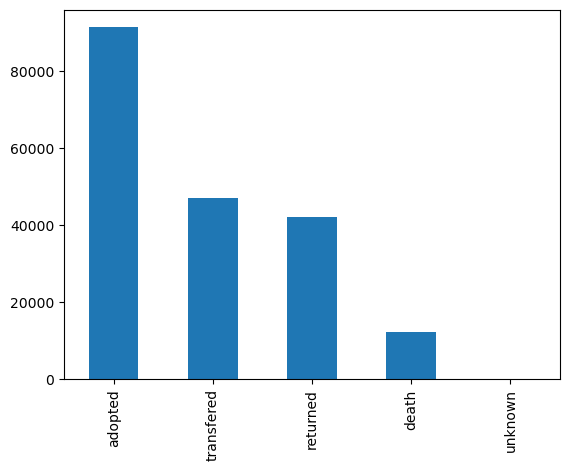

In [26]:
animals.outcome.value_counts().plot.bar()

In [27]:
deaths = animals[animals.outcome == 'death']

In [34]:
deaths = deaths.set_index('datetime_out')

In [40]:
deaths[deaths.intake_type != 'Wildlife'].intake_condition.value_counts()

Normal        3245
Injured       1851
Sick          1125
Nursing        176
Aged            87
Other           29
Neonatal        21
Medical         14
Behavior        11
Pregnant         8
Feral            7
Med Urgent       2
Agonal           2
Med Attn         2
Name: intake_condition, dtype: int64

In [41]:
deaths[deaths.intake_type == 'Wildlife'].intake_condition.value_counts()

Normal        2973
Sick          1613
Injured       1035
Nursing         48
Neonatal         7
Other            2
Medical          2
Aged             1
Neurologic       1
Feral            1
Unknown          1
Name: intake_condition, dtype: int64

In [35]:
deaths

,animal_id,name,datetime_in,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,date_of_birth,outcome_type,outcome_subtype,sex_upon_outcome,age_upon_outcome,outcome
datetime_out,,,,,,,,,,,,,,,,,
2013-10-26 18:45:00,A666101,NaN,2013-10-26 18:33:00,Payne in Austin (TX),Wildlife,Injured,Other,Unknown,0 years,Squirrel Mix,Gray/Brown,10/26/2013,Euthanasia,NaN,Unknown,0 years,death
2013-10-09 15:59:00,A664830,NaN,2013-10-09 15:34:00,15043 Savannah Heights in Travis (TX),Wildlife,Sick,Other,Unknown,1 year,Raccoon Mix,Brown/Black,10/09/2012,Euthanasia,Suffering,Unknown,1 year,death
2013-10-21 18:50:00,A665706,NaN,2013-10-21 18:06:00,43 Rainey St in Austin (TX),Wildlife,Normal,Other,Unknown,1 year,Bat Mix,Brown,10/21/2012,Disposal,NaN,Unknown,1 year,death
2013-10-18 12:13:00,A656761,Gotti,2013-10-02 15:02:00,Austin (TX),Public Assist,Normal,Dog,Intact Male,7 years,Pit Bull Mix,Fawn,06/18/2006,Euthanasia,Court/Investigation,Intact Male,7 years,death
2013-10-15 08:16:00,A665188,NaN,2013-10-14 22:25:00,2207 Pasadena Dr in Austin (TX),Wildlife,Normal,Other,Unknown,4 weeks,Bat,Brown/Black,09/14/2013,Euthanasia,Rabies Risk,Unknown,4 weeks,death
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-21 12:36:00,A879093,NaN,2023-04-21 10:54:00,8507 Rosemary Lane in Austin (TX),Wildlife,Injured,Other,Unknown,2 years,Skunk,Black/White,04/21/2021,Euthanasia,Rabies Risk,Unknown,NaN,death
2023-04-20 15:49:00,A878909,Luna,2023-04-18 16:22:00,Farm To Market 969 And Imperial Drive North in...,Stray,Sick,Dog,Intact Female,2 years,Pit Bull Mix,White/Blue,04/18/2021,Died,At Vet,Intact Female,2 years,death
2023-04-22 11:36:00,A879154,NaN,2023-04-22 11:05:00,Spring Lake Drive in Austin (TX),Stray,Injured,Cat,Unknown,4 weeks,Domestic Shorthair,Orange,03/22/2023,Euthanasia,Suffering,Unknown,4 weeks,death


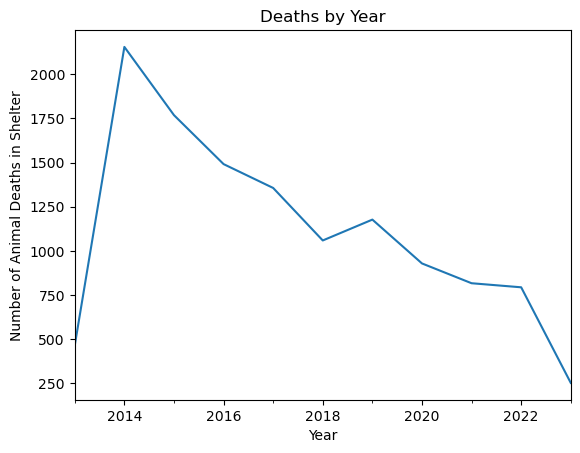

In [43]:
deaths.resample('Y').animal_id.count().plot()
plt.title('Deaths by Year')
plt.xlabel('Year')
plt.ylabel('Number of Animal Deaths in Shelter')
plt.show()